# Capstone Project

In [34]:
# Imports
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [35]:
# load data
random_state = 42
df = pd.read_csv('../data/train.csv')

In [36]:
# Show the first 5 rows of the dataset
print(df.head())

   ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0       1     39353   85475         117961         118300         123472   
1       1     17183    1540         117961         118343         123125   
2       1     36724   14457         118219         118220         117884   
3       1     36135    5396         117961         118343         119993   
4       1     42680    5905         117929         117930         119569   

   ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0      117905            117906       290919     117908  
1      118536            118536       308574     118539  
2      117879            267952        19721     117880  
3      118321            240983       290919     118322  
4      119323            123932        19793     119325  


In [37]:
# Show a quick description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
ACTION              32769 non-null int64
RESOURCE            32769 non-null int64
MGR_ID              32769 non-null int64
ROLE_ROLLUP_1       32769 non-null int64
ROLE_ROLLUP_2       32769 non-null int64
ROLE_DEPTNAME       32769 non-null int64
ROLE_TITLE          32769 non-null int64
ROLE_FAMILY_DESC    32769 non-null int64
ROLE_FAMILY         32769 non-null int64
ROLE_CODE           32769 non-null int64
dtypes: int64(10)
memory usage: 2.5 MB


In [38]:
# find different number of categories for each feature
for attr in df:
    print('\n')
    print(df[attr].value_counts())



1    30872
0     1897
Name: ACTION, dtype: int64


4675      839
79092     484
25993     409
75078     409
3853      404
6977      299
75834     299
32270     295
42085     247
17308     239
1020      236
13878     220
42093     204
18418     192
7543      186
23921     167
278393    163
34924     161
79121     157
28149     137
18072     136
20364     135
39262     129
14354     127
23096     126
75901     115
15064     113
33054     108
20897     104
33642      99
         ... 
35046       1
92378       1
100413      1
79728       1
79792       1
36894       1
28635       1
59370       1
45057       1
30629       1
18462       1
38809       1
77905       1
42879       1
75631       1
39012       1
30565       1
18275       1
79693       1
97530       1
28793       1
18243       1
20290       1
26407       1
43202       1
35014       1
75535       1
30936       1
89856       1
16376       1
Name: RESOURCE, Length: 7518, dtype: int64


770       152
2270       99
2594       82
1350  

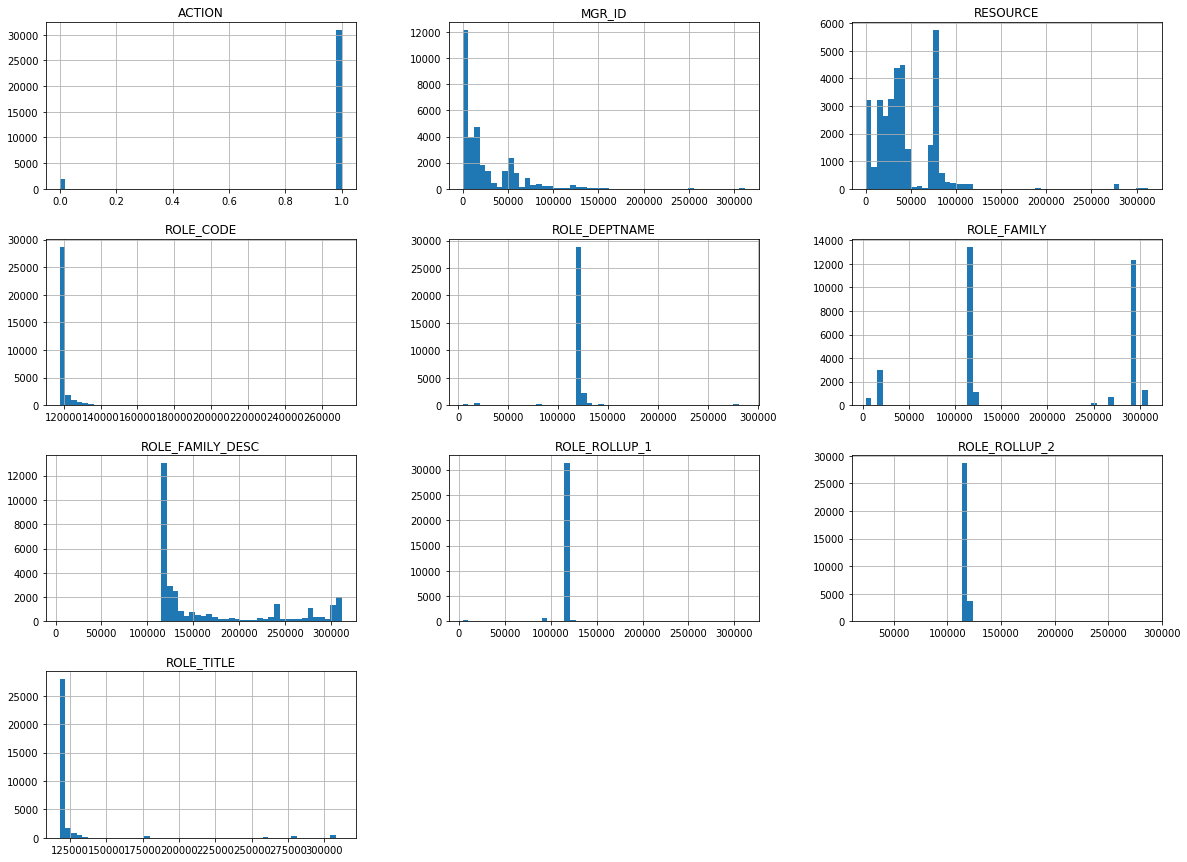

In [39]:
# draw histograms for each attribute
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [135]:
# set aside a test set
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=random_state)
for train_index, test_index in sss.split(df, df['ACTION']):
    train_set, test_set = df.loc[train_index], df.loc[test_index]

In [149]:
access = train_set.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25c6014190>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f25beee5650>]], dtype=object)

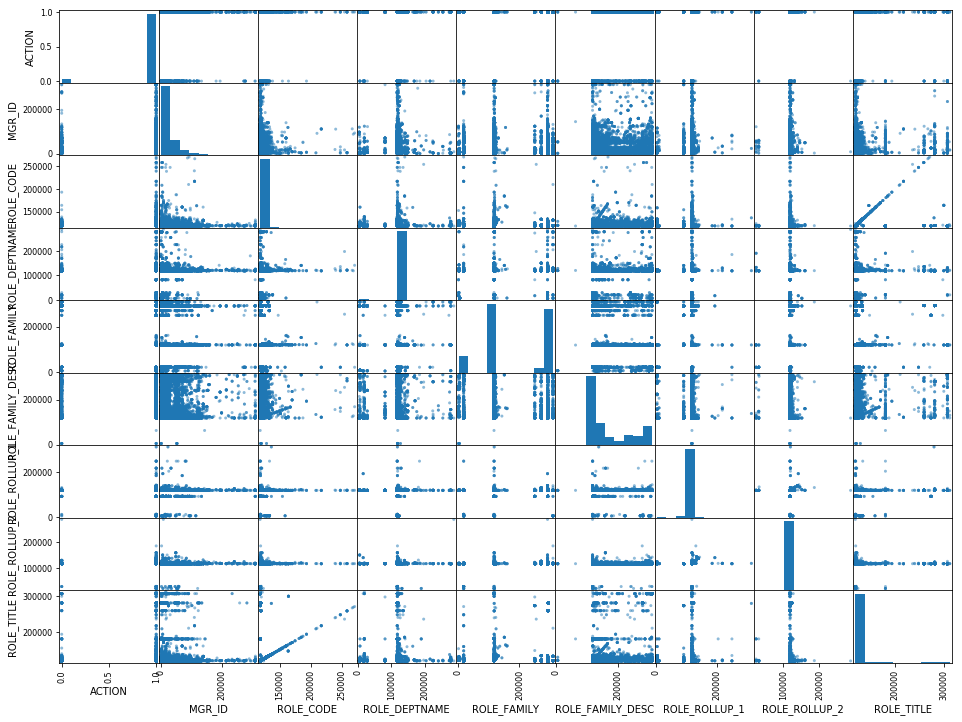

In [155]:
from pandas.plotting import scatter_matrix
#attributes = list(access.columns.values)
attributes = ['ACTION',  'MGR_ID', 'ROLE_CODE', 'ROLE_DEPTNAME', 'ROLE_FAMILY', 'ROLE_FAMILY_DESC',
            'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_TITLE']
scatter_matrix(access[attributes], figsize=(16, 12))

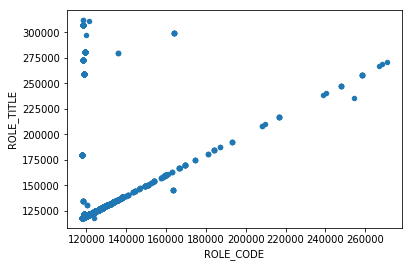

In [156]:
access.plot(kind='scatter', x='ROLE_CODE', y='ROLE_TITLE')

In [139]:
# extract labels and predictors 
access = train_set.drop('ACTION', axis=1)
access_labels = train_set['ACTION'].copy()

In [140]:
# Data frame selector class, taken from "Hands-On Machine Learning with Scikit-Learn & Tensorflow by Aurélion Géron
# (O'Reilly). Copyright 2017 Aurélion Géron, 978-1-491-96229-9, Page 41
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [141]:
# get attributes
attributes = access.columns.values.tolist()

In [142]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# one-hot encode the categorial attributes
pipeline = Pipeline([
    ('selector', DataFrameSelector(attributes)),
    ('encoder', OneHotEncoder())
])
access_1hot = pipeline.fit_transform(access)
print('Shape: ', access_1hot.shape)

('Shape: ', (24576, 14064))


In [143]:
# calls fit on the specified model with the one-hot encoded attributes and the target labels
def train_model(model):
    model.fit(access_1hot, access_labels)

In [144]:
from sklearn.metrics import roc_auc_score

# displays the area under the roc curve score for the specified model
def display_single_auc_result(model):
    access_predictions = model.predict(access_1hot)
    auc = roc_auc_score(access_labels, access_predictions)
    print('Single AUC score: ', auc)
    

In [145]:
from sklearn.model_selection import cross_val_score

# display cross validation auc scores, mean and standard deviation for the specified model 
# using the one-hot encoded training set and the corresponding labels
def display_auc_scores(model):
    scores = cross_val_score(model, access_1hot, access_labels, scoring='roc_auc', cv=10)
    print('--- Cross validation scores ---')
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Std: ', scores.std())

In [146]:
def display_models(models):
    for i, (model, model_name) in enumerate(models):
        train_model(model)
        print('-------------------')
        print(model_name + ':')
        display_single_auc_result(model)
        display_auc_scores(model)
        print('-------------------')


In [147]:
# initialize many different models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
log_reg = LogisticRegression(random_state=random_state)
decision_tree = DecisionTreeClassifier(random_state=random_state)
random_forest = RandomForestClassifier(random_state=random_state)

models = [(log_reg, 'Logistic Regression'), (decision_tree, 'Decision Tree'), (random_forest, 'Random Forest')]

display_models(models)

-------------------
Logistic Regression:
('Single AUC score: ', 0.66906985487689985)
--- Cross validation scores ---
('Scores: ', array([ 0.86783489,  0.79915939,  0.79383764,  0.87851276,  0.85076963,
        0.86988866,  0.86555532,  0.85809023,  0.84325891,  0.86433091]))
('Mean: ', 0.84912383267572067)
('Std: ', 0.027958452541170693)
-------------------
-------------------
Decision Tree:
('Single AUC score: ', 1.0)
--- Cross validation scores ---
('Scores: ', array([ 0.72610421,  0.65552647,  0.6762896 ,  0.72783896,  0.71368905,
        0.69061844,  0.69895659,  0.71986737,  0.71584887,  0.69457153]))
('Mean: ', 0.70193110819344817)
('Std: ', 0.022160963574468465)
-------------------
-------------------
Random Forest:
('Single AUC score: ', 0.9775023880223096)
--- Cross validation scores ---
('Scores: ', array([ 0.82683551,  0.7928367 ,  0.76518171,  0.83157302,  0.82173668,
        0.8546634 ,  0.82847778,  0.84174855,  0.82905424,  0.83863353]))
('Mean: ', 0.82307411220912685)
(